# Chrun Analysis

- Predict customer behavior to retain customers

### Data Content

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Handle empty string record in Total charges column
df = df[~(df['TotalCharges']== ' ')]

In [8]:
# 
df.TotalCharges = df.TotalCharges.apply(lambda x: float(x))

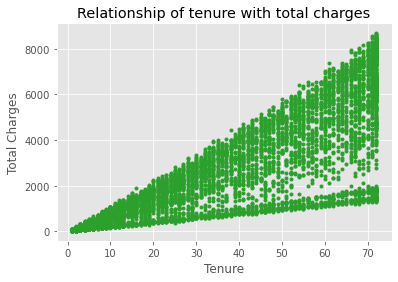

In [9]:
plt.style.use('ggplot')
plt.plot(df['tenure'], df['TotalCharges'],'.', color='#2ca02c')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Relationship of tenure with total charges')
plt.show()

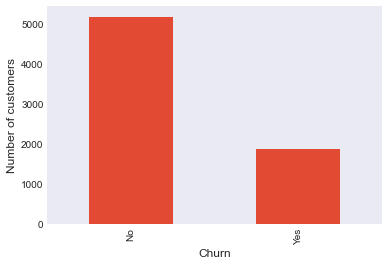

In [10]:
# Churn distribution
plt.style.use('seaborn-dark')
df.Churn.value_counts().plot.bar()
plt.xlabel('Churn')
plt.ylabel('Number of customers')
plt.show()

In [11]:
# 
df.groupby(by=['gender','Churn']).count()

customerID  SeniorCitizen  Partner  Dependents  tenure  \
gender Churn                                                           
Female No           2544           2544     2544        2544    2544   
       Yes           939            939      939         939     939   
Male   No           2619           2619     2619        2619    2619   
       Yes           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
gender Churn                                                                 
Female No             2544           2544             2544            2544   
       Yes             939            939              939             939   
Male   No             2619           2619             2619            2619   
       Yes             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender Churn                                                             
Female No             2544              2544         2544         2544   
       Yes             939               939          939          939   
Male   No             2619              2619         2619         2619   
       Yes             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
gender Churn                                                               
Female No                2544      2544              2544           2544   
       Yes                939       939               939            939   
Male   No                2619      2619              2619           2619   
       Yes                930       930               930            930   

              MonthlyCharges  TotalCharges  
gender Churn                                
Female No               2544          2544  
       Yes               939           939  
Male   No               2619          2619  
       Yes               930           930

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Correlation among independent variables (numerical)

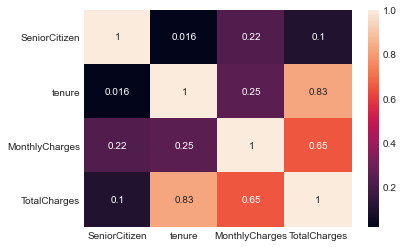

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

- High correlated features are **tenure** and **Total Charges**

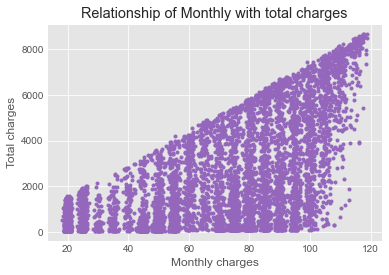

In [14]:
plt.style.use('ggplot')
plt.plot(df['MonthlyCharges'], df['TotalCharges'],'.', color='#9467bd')
plt.xlabel('Monthly charges')
plt.ylabel('Total charges')
plt.title('Relationship of Monthly with total charges')
plt.show()

In [15]:
# Remove Monthly charges and tenure column
df = df.drop(['MonthlyCharges','tenure'], axis=1)

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [18]:
df.shape

(7032, 19)

In [19]:
df.MultipleLines = df.MultipleLines.apply(lambda x : 'No' if x == 'No phone service' else x)

In [20]:
df.OnlineSecurity = df.OnlineSecurity.apply(lambda x : 'No' if x == 'No internet service' else x)

In [21]:
df.OnlineBackup = df.OnlineBackup.apply(lambda x : 'No' if x == 'No internet service' else x)

In [22]:
df.DeviceProtection = df.DeviceProtection.apply(lambda x : 'No' if x == 'No internet service' else x)

In [23]:
df.TechSupport = df.TechSupport.apply(lambda x : 'No' if x == 'No internet service' else x)

In [24]:
df.StreamingTV = df.StreamingTV.apply(lambda x : 'No' if x == 'No internet service' else x)

In [25]:
df.StreamingMovies = df.StreamingMovies.apply(lambda x : 'No' if x == 'No internet service' else x)

In [26]:
df.StreamingMovies = df.StreamingMovies.apply(lambda x : 'No' if x == 'No internet service' else x)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [28]:
categorical_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [29]:
pd.get_dummies(df, columns=categorical_cols, drop_first=True)

,customerID,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,29.85,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,1889.50,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,108.15,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,1840.75,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,151.65,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1990.50,1,1,1,1,1,0,0,...,1,1,1,1,0,1,0,0,1,0
7039,2234-XADUH,0,7362.90,0,1,1,1,1,1,0,...,0,1,1,1,0,1,1,0,0,0
7040,4801-JZAZL,0,346.45,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,306.60,1,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1


In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [31]:
df.TotalCharges = (df.TotalCharges.values - df.TotalCharges.values.mean())/df.TotalCharges.values.std()

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-0.994194,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.173740,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.959649,Yes
3,7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.195248,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-0.940457,Yes


In [33]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [34]:
df.head()

,customerID,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,-0.994194,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,-0.173740,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,-0.959649,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,-0.195248,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,-0.940457,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [35]:
df = df.drop(['customerID'], axis=1)

In [38]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [40]:
Y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size=0.25, stratify=Y)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1291
           1       0.64      0.53      0.58       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


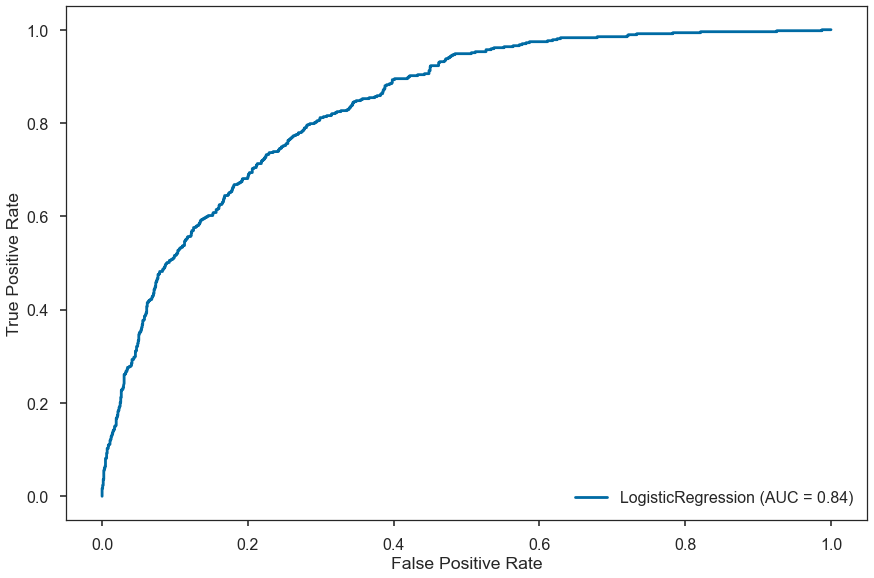

In [94]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score

model0 = LogisticRegression()
model0.fit(train_X, train_y)
ypred0 = model0.predict(test_X)

print(classification_report(test_y, ypred0))
auc_lr = roc_auc_score(test_y, ypred0)
plot_roc_curve(model0, test_X, test_y)
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1291
           1       0.47      0.51      0.49       467

    accuracy                           0.72      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.72      0.72      1758



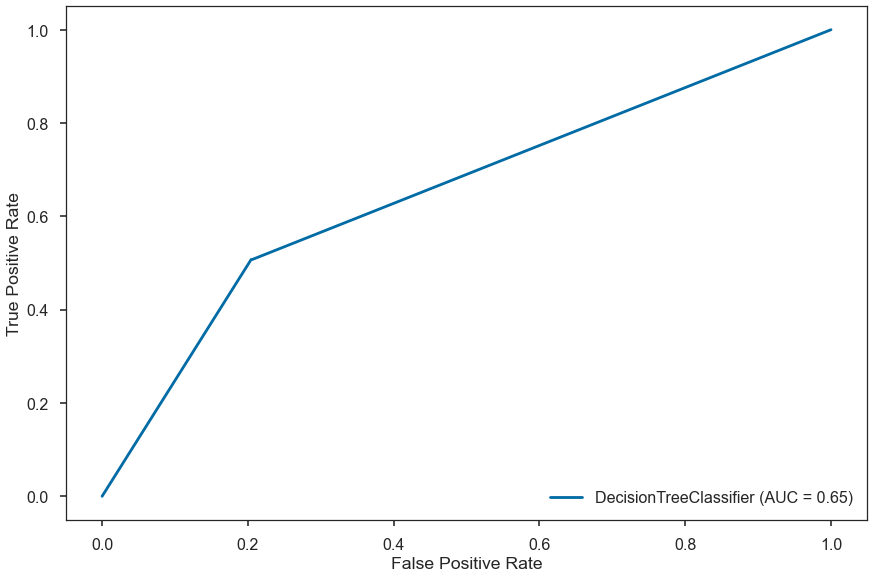

In [98]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(train_X, train_y)
ypred1 = model1.predict(test_X)

print(classification_report(test_y, ypred1))

auc_dt = roc_auc_score(test_y, ypred1)
plot_roc_curve(model1, test_X, test_y)
plt.show()

<ipython-input-99-4b2adc16a17b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_X, train_y)


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1291
           1       0.61      0.47      0.53       467

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



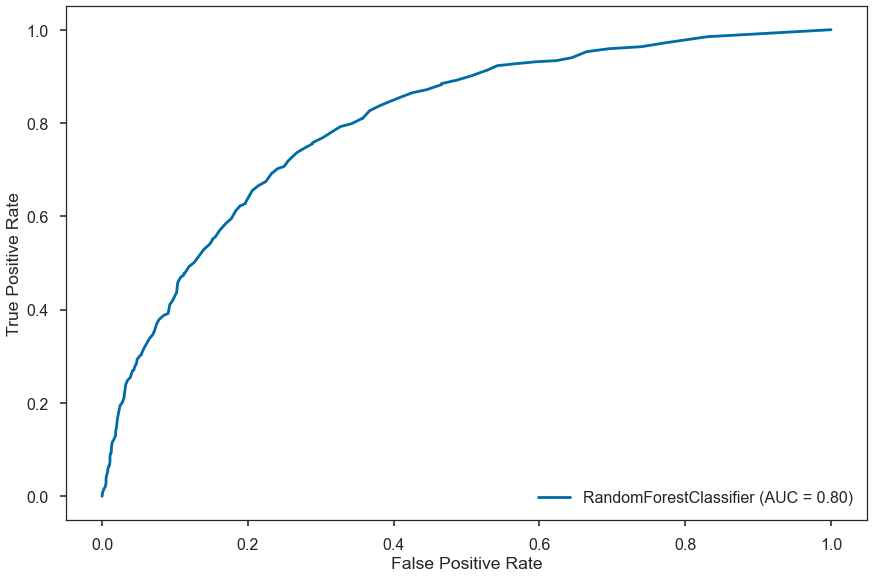

In [99]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(train_X, train_y)
ypred2 = model2.predict(test_X)

print(classification_report(test_y, ypred2))

auc_rf = roc_auc_score(test_y, ypred2)
plot_roc_curve(model2, test_X, test_y)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.64      0.52      0.57       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



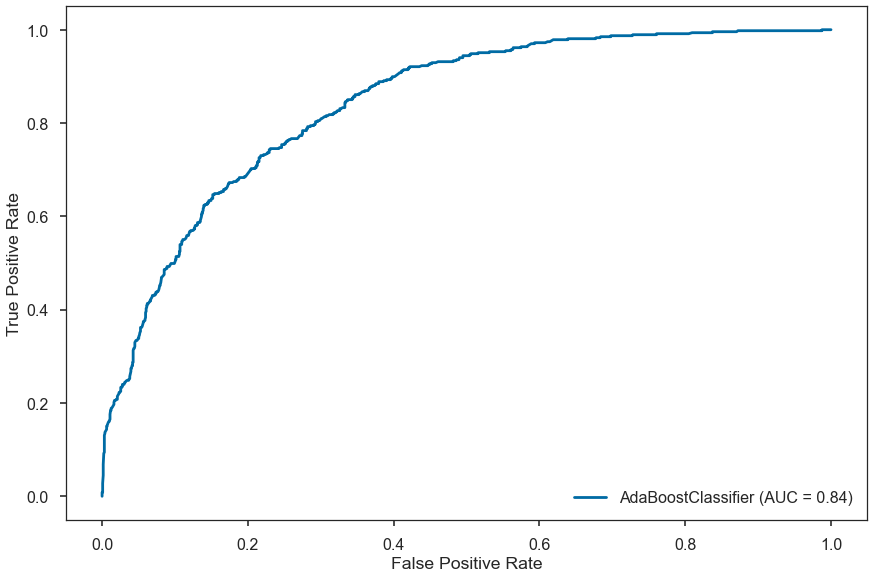

In [100]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(train_X, train_y)
ypred3 = model3.predict(test_X)

print(classification_report(test_y, ypred3))

auc_ab = roc_auc_score(test_y, ypred3)
plot_roc_curve(model3, test_X, test_y)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1291
           1       0.64      0.50      0.56       467

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758



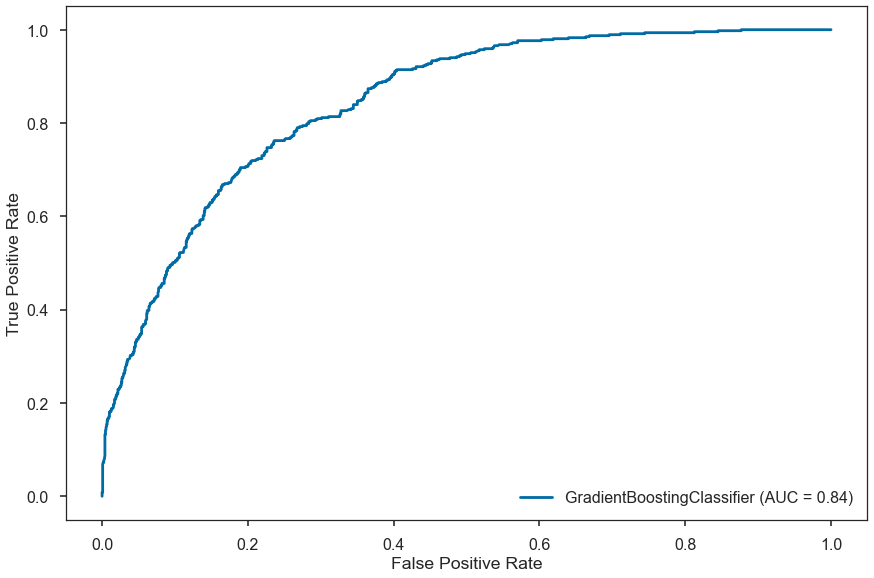

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(train_X, train_y)
ypred4 = model4.predict(test_X)

print(classification_report(test_y, ypred4))

auc_gb = roc_auc_score(test_y, ypred4)
plot_roc_curve(model4, test_X, test_y)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[01:50:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


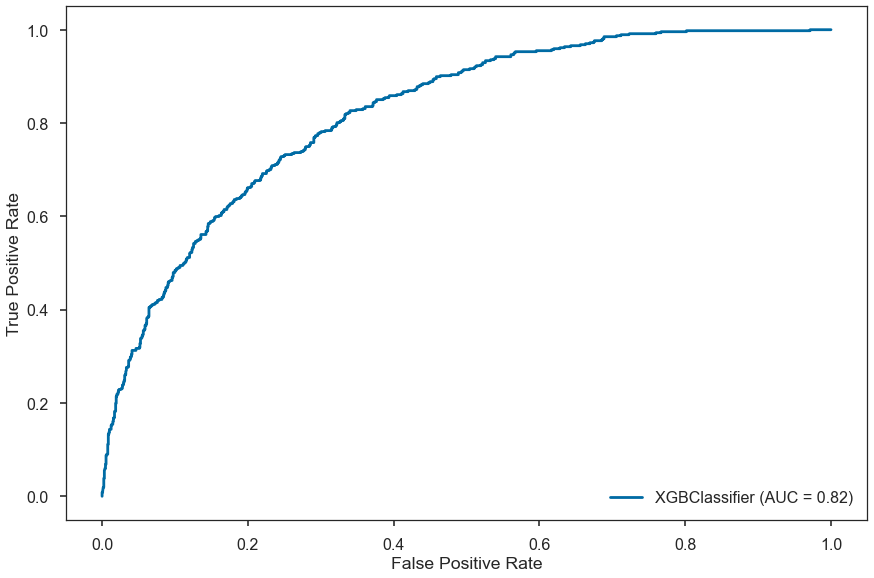

In [102]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
model5.fit(train_X, train_y)
ypred5 = model5.predict(test_X)

print(classification_report(test_y, ypred5))

auc_xgb = roc_auc_score(test_y, ypred5)
plot_roc_curve(model5, test_X, test_y)
plt.show()

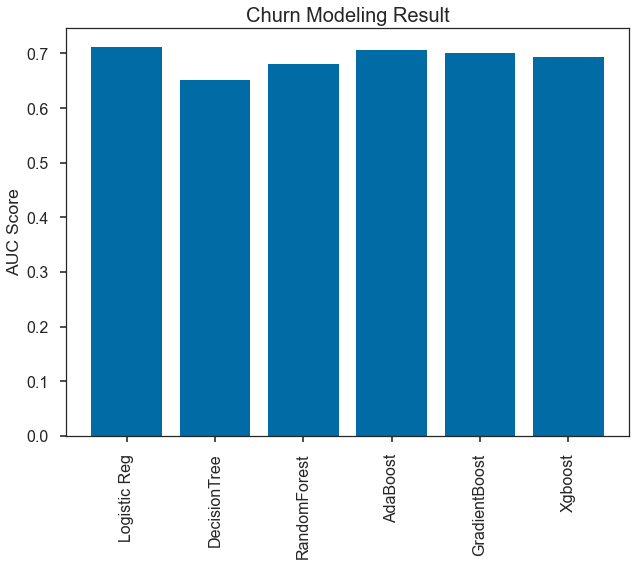

In [104]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(9,7))
model_list = ['Logistic Reg', 'DecisionTree','RandomForest','AdaBoost','GradientBoost','Xgboost']
auc_socre = [auc_lr, auc_dt, auc_rf, auc_ab, auc_gb, auc_xgb]
plt.bar(model_list, auc_socre)
plt.xticks(rotation=90)
plt.ylabel('AUC Score')
plt.title('Churn Modeling Result', fontsize=20)
plt.show()